# Introduction to Seaborn

Seaborn is a statistical plotting library
1. It has beautiful default styles
2. It a`lso is designed to work very well with pandas dataframe objects

## Imports

In [2]:
import seaborn as sns

Since seaborn is built on the top of matplotlib therefore we can use the following command for generating the inline plots

In [3]:
%matplotlib inline

## Data 

Seaborn comes in with a few built-in datasets which we can directly load. The following dataset 'tips' contains information regarding the people who had a meal and left a tip after that.

In [4]:
# load the tips dataset from seaborn library
tips = sns.load_dataset('tips')

In [5]:
# display the head of the tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plots 

Let's discuss some plots that allow us to visualize the distribution of a dataset. These plots are: -
* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

The distplot shows the distribution of a univariate (one variable) set of observations.

C:\Users\Utkarsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


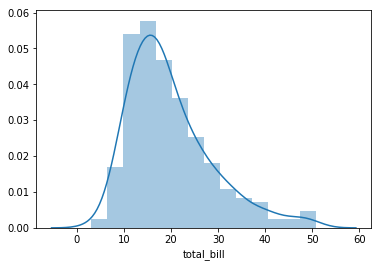

In [6]:
sns.distplot(tips['total_bill'])
# Safe to ignore the warnings

The above plot shows us a histogram with a `KDE (kernel density estimation)` represented by the bars and the blue line over it. We can remove the blue line showing the KDE by setting the `kde` argument as `False`.

As we can observe from the above distribution, most of the people who left a tip had a total bill between $10$ dollars to $20$ dollars

We can change the size of the bins in the histogram. This value really depends on our data. If the bin value is too low, then we get just one massive bin. If the bin value is too high then we might get bins which are empty because we are literally trying to plot the frequency of every instance in the range of our data.

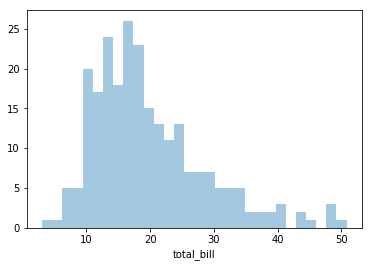

In [7]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

## jointplot

The jointplot() allows you to match up data for two displots for bivariate (two variables) data at your choice of what parameter to compare with: -

* scatter
* reg
* resid
* kde
* hex

A joint plot allows us to match up to dist plots for bivariate data i.e. we can combine 2 distribution plots

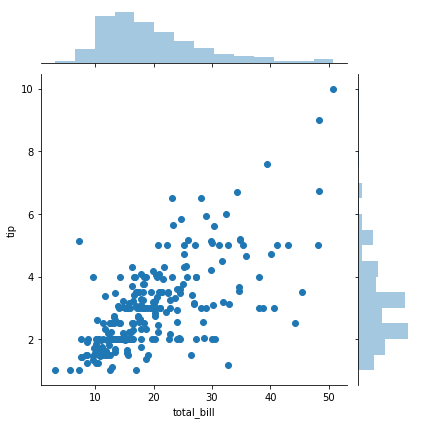

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

As can be seen from the plot above, the joint plot shows us the histograms (distributions) of the 'total_bill' and the 'tip' paid by the person, along with a scatter plot showing the correlation between the two variables.

The parameter 'kind' decides which plot will be shown. By default, it is set to 'scatter' but we can change it as we wish.

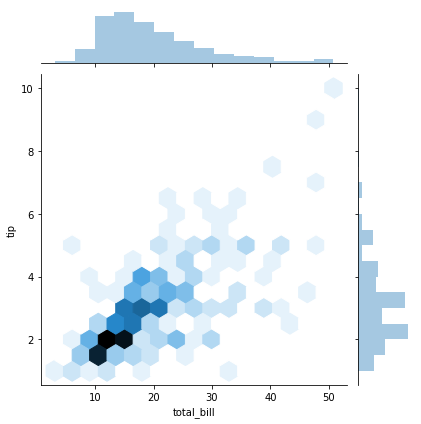

In [9]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

In the above example of a joint distribution, we use 'hex' instead of 'scatter'. This is similar to a scatter plot, the difference being, a darker hexagonal region represents greater occurences.

Another value which we can give to the 'kind' parameter of the joint plot is 'reg' which stands for regression. It is similar to a scatter plot, but also fits a linear regression line through the data

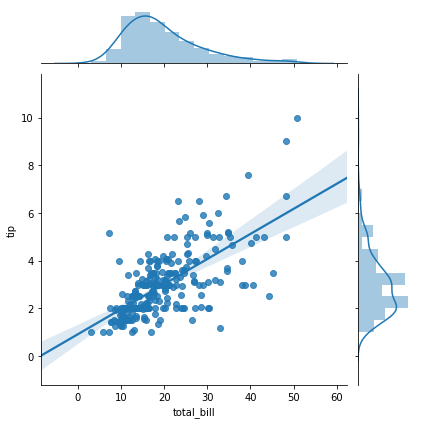

In [10]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='regplot')

Apart from fitting a regression line, we can also make a kernel density estimate which shows us the density of regions where these points match up. The darker the region, the more is the number of cases of the two variables matching up.

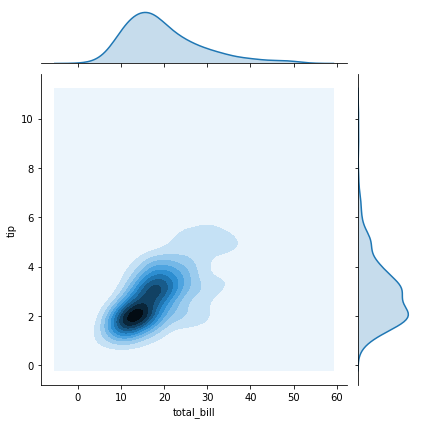

In [11]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde')

## Pair Plot

A pair plot helps us visualize pair-wise relationships across the entire dataframe (atleast for the numerical columns) and it also supports a `'hue'` parameter for the categorical columns

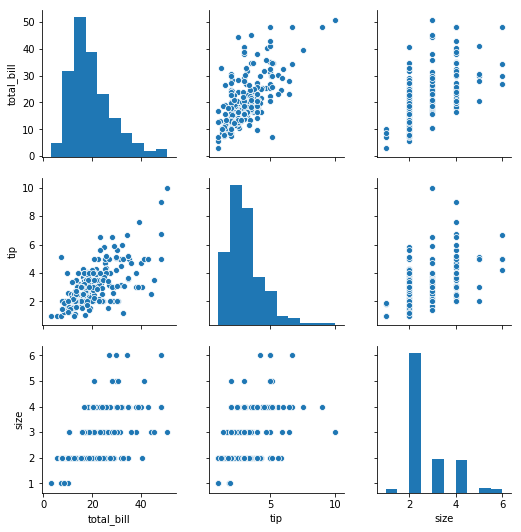

In [12]:
sns.pairplot(tips)

The pair plot takes into account all possible numerical columns of the data frame. It plots a histogram (instead of a scatter plot) where the 'x' and 'y' columns are the same data. (see left diagonal in the above plot)     
     
Keep in mind that the larger the dataframe, the more time it takes for the pairplot() function to run. 

We can specify any `categorical` column of our data frame as the `hue` parameter. That will categorise the data based on value of that column (in this case `'gender'`)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


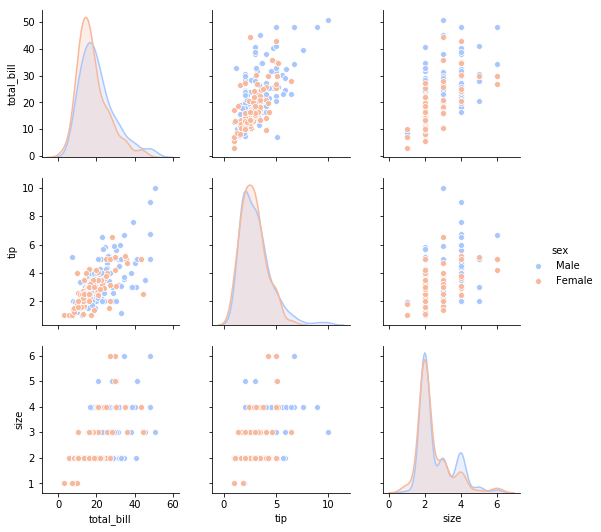

In [14]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

## Rug Plot

A rugplot is similar to a distribution plot (histogram) but instead of stacking up the occurences of a particular value on top of each other. It draws the dashes corresponding to the values at the same place

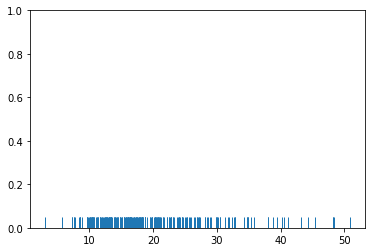

In [17]:
sns.rugplot(tips['total_bill'])

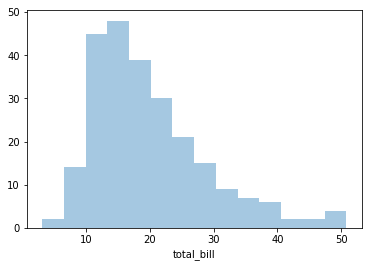

In [19]:
sns.distplot(tips['total_bill'], kde=False)

The difference between a distribution plot (histogram) and a rugplot is that the former represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin whereas in the latter positions of the data points along x and y are denoted by tick marks, reminiscent of the tassels on a rug.

(0, 1)

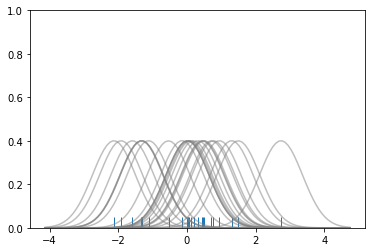

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

The grey lines depict normal distributions centred on each of the blue dashes (which are a part of the rug plot). Now we can go ahead and find the sum the normal distribution curves to get the kernel density basis function.

Text(0.5, 0.98, 'Sum of the Basis Functions')

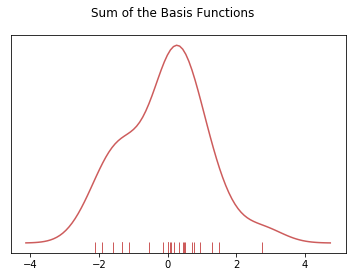

In [21]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

The orange curve shown above is the kernel density estimate (KDE) which is constructed from the distribution plot